In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_row",None)
pd.set_option("display.max_columns",None)

In [35]:
data = pd.read_csv("X-IIoTID dataset.csv", na_values= '#DIV/0!')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,5,12,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
data.shape

(820834, 68)

In [37]:
data.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,9/01/2020,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,34924,1,0,True,True,True,True,True,False,False,105,18905,105,40392,TRUE,107658,210,311.7160712,159803.4704,0.5,0.5,0.300414275,0.699585725,9.207,5.55584206,10.994,1.356305275,4.864,1.873004004,0.311,0.224653066,74.624,8.245611196,12.297,10.38585004,8,10.50714043,4.297,2.723578712,2.146,0.102781321,915852.8,2507.97563,5.1,3.238826948,2806.2,158.7493622,1,5,0,0,0,0,0,0,Scanning_vulnerability,Reconnaissance,Attack
1,13/01/2020,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,0,1,0,False,False,False,True,False,False,False,2,134,0,0,FALSE,212,2,24096.38554,2554216.867,1,0,1,0,12.326,6.674247823,2.895,1.604302029,3.778,2.099741889,2.741,5.327471164,78.263,8.869399134,6.6,5.713142743,0,0,6.6,5.713142743,0.612,0.037629775,910498.4,4044.112046,1,0.894427191,1561.6,247.0802299,0,0,0,0,0,0,0,0,Normal,Normal,Normal
2,9/01/2020,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,38,1,0,False,False,False,True,False,False,False,1,66,1,66,FALSE,208,2,15151.51515,1575757.576,0.5,0.5,0.5,0.5,6.931,6.416007248,0.706,0.408905857,1.693,0.771635277,2.423,3.829809525,88.245,7.112108337,37.4,40.19004852,30.1,39.79811553,7.3,3.1,0.55,0.02,921020.4,2139.652645,1,0,1603.3,294.1390997,0,0,0,0,0,0,0,0,Normal,Normal,Normal
3,27/02/2020,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,484,1,0,True,True,True,True,True,False,False,8,1545,6,804,FALSE,3954,14,1.492779055,421.6034558,0.571428571,0.428571429,0.67425392,0.32574608,10.244,7.932040343,1.965,1.514168088,3.941,1.709055002,0.509,0.425522032,83.339,10.20608686,29,26.57442379,23.3,26.12680616,5.7,6.229767251,0.708,0.026,915874.8,977.8851466,7.2,5.325410782,1685.3,467.8737116,0,0,1,1,1,1,1,1,Normal,Normal,Normal
4,16/12/2019,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,-,1,0,False,False,False,True,False,False,False,-,-,-,-,FALSE,-,-,-,-,-,-,-,-,5.181,5.980458929,2.365,1.284462923,2.415,1.401151312,1.803,4.478256469,88.239,8.090017862,9.8,1.326649916,0.1,0.3,9.7,1.268857754,0.536,0.030066593,918213.2,2342.93836,0.6,0.489897949,1456.5,346.8847791,0,0,0,0,0,0,0,0,Normal,Normal,Normal


### Analyse de forme :
* variable target : class3
* lignes et colonnes : 820834, 68
* types de variables : object 52 |int 9 | bool 7
* Analyse des valeurs manquantes: Date   :0.040325%  |  Timestamp    :0.036183% | Protocol                       0.018761%

In [38]:
dt_eda = data.iloc[:10001].copy()

In [39]:
dt_eda.shape

(10001, 68)

In [40]:
dt_eda.dtypes.value_counts()

object    52
int64      9
bool       7
dtype: int64

In [41]:
dt_eda["class3"].value_counts(normalize=True)

Normal    0.517948
Attack    0.482052
Name: class3, dtype: float64

In [42]:
dt_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         9997 non-null   object
 1   Timestamp                    9999 non-null   object
 2   Scr_IP                       10001 non-null  object
 3   Scr_port                     10001 non-null  object
 4   Des_IP                       10001 non-null  object
 5   Des_port                     10001 non-null  object
 6   Protocol                     10001 non-null  object
 7   Service                      10001 non-null  object
 8   Duration                     10001 non-null  object
 9   Scr_bytes                    10001 non-null  object
 10  Des_bytes                    10001 non-null  object
 11  Conn_state                   10001 non-null  int64 
 12  missed_bytes                 10001 non-null  object
 13  is_syn_only                  10

In [43]:
dt_eda = dt_eda.replace("?", np.nan)

In [44]:
dt_eda["anomaly_alert"] = dt_eda["anomaly_alert"].replace({"FALSE":False,"TRUE":True})
dt_eda["anomaly_alert"] = dt_eda["anomaly_alert"].astype(bool)

In [45]:
(dt_eda.isna().sum())*100/dt_eda.shape[0]

Date                           0.039996
Timestamp                      0.039996
Scr_IP                         0.019998
Scr_port                       0.019998
Des_IP                         0.019998
Des_port                       0.019998
Protocol                       0.019998
Service                        0.000000
Duration                       0.000000
Scr_bytes                      0.000000
Des_bytes                      0.000000
Conn_state                     0.000000
missed_bytes                   0.000000
is_syn_only                    0.000000
Is_SYN_ACK                     0.000000
is_pure_ack                    0.000000
is_with_payload                0.000000
FIN or RST                     0.000000
Bad_checksum                   0.000000
is_SYN_with_RST                0.000000
Scr_pkts                       0.000000
Scr_ip_bytes                   0.000000
Des_pkts                       0.000000
Des_ip_bytes                   0.000000
anomaly_alert                  0.000000


### Analyse de Fond:
* visualisation de la target : 0.517948 |Attack    0.482052
* signification des variables :
  * les variables continues ne sont pas sdandarisées
  * la seul variable qualitatives est: anaemia,diabetes,sex,smoking
* Relation variables / target :

In [46]:
dt_eda = dt_eda.drop(columns=["Date","Timestamp","Scr_IP","Des_IP","class1","class2"])

In [47]:
for col in dt_eda.select_dtypes("int64"):
    print(f'{col :-<50} {dt_eda[col].unique()}')

Conn_state---------------------------------------- [1 0]
OSSEC_alert--------------------------------------- [1 0]
OSSEC_alert_level--------------------------------- [ 5  0  3 10  6]
Login_attempt------------------------------------- [0 1]
Succesful_login----------------------------------- [0 1]
File_activity------------------------------------- [0 1]
Process_activity---------------------------------- [0 1]
read_write_physical.process----------------------- [0 1]
is_privileged------------------------------------- [0 1]


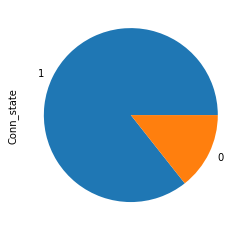

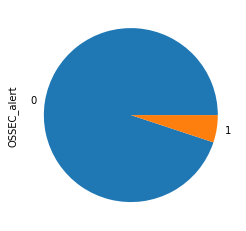

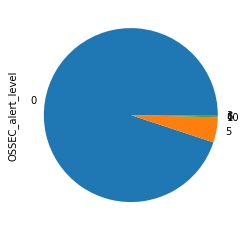

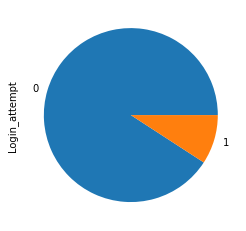

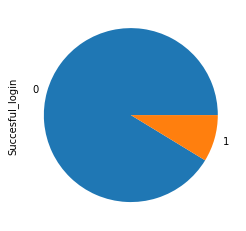

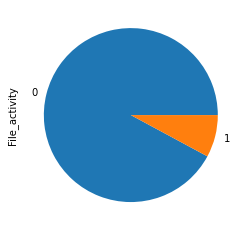

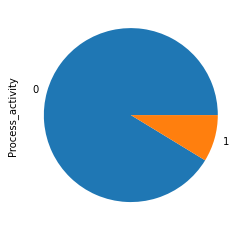

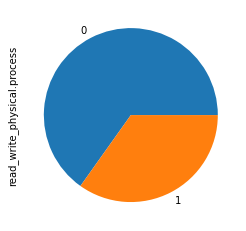

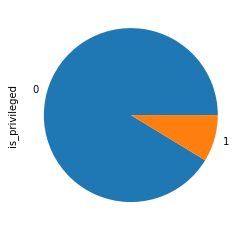

In [48]:
for col in dt_eda.select_dtypes("int64"):
    plt.figure()
    dt_eda[col].value_counts().plot.pie()

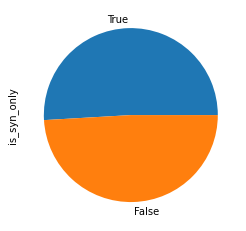

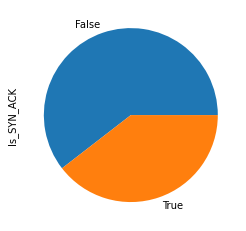

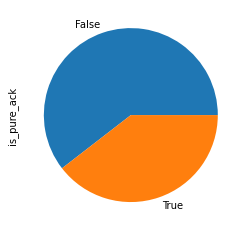

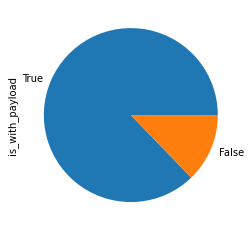

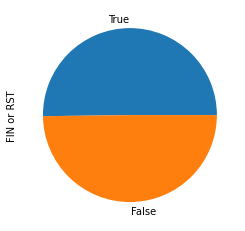

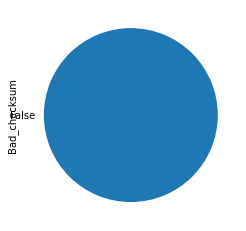

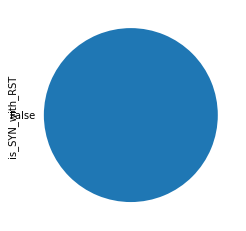

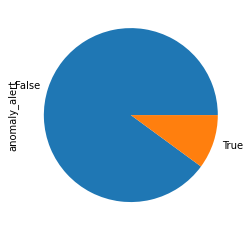

In [49]:
for col in dt_eda.select_dtypes(bool):
    plt.figure()
    dt_eda[col].value_counts().plot.pie()

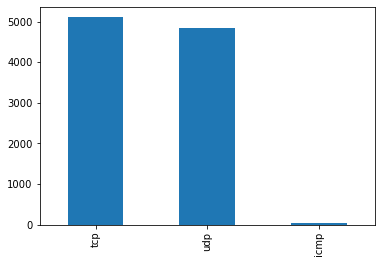

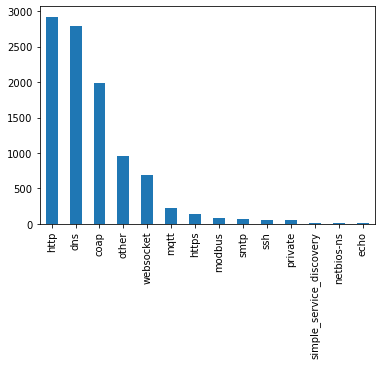

In [50]:
for col in ["Protocol","Service"]:
    plt.figure()
    dt_eda[col].value_counts().plot.bar()

In [51]:
dt_eda = dt_eda.replace({"-":np.nan})

In [52]:
for col in dt_eda.drop(columns=["Protocol","Service","class3"]).select_dtypes(object):
    dt_eda[col] = dt_eda[col].apply(float)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

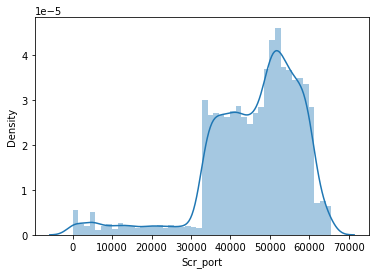

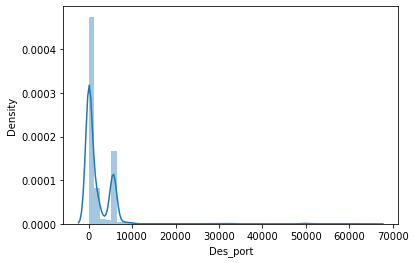

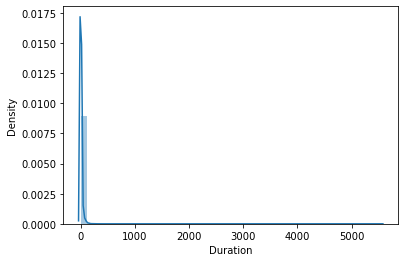

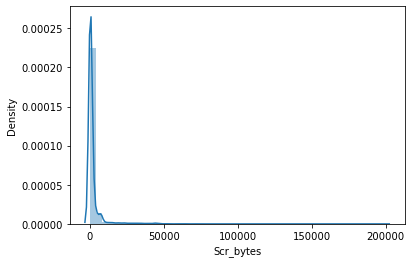

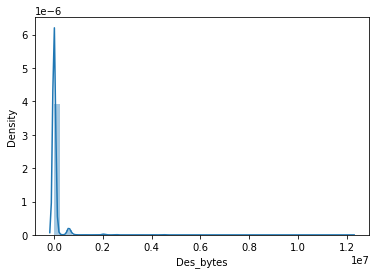

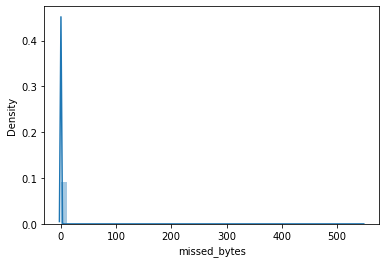

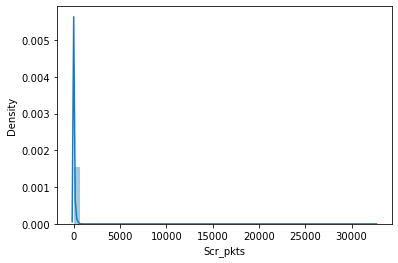

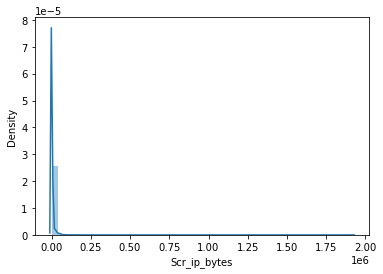

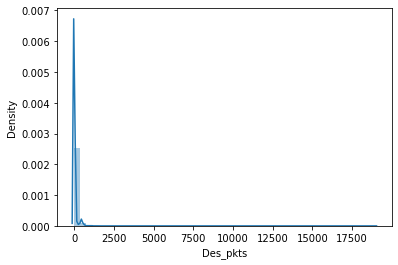

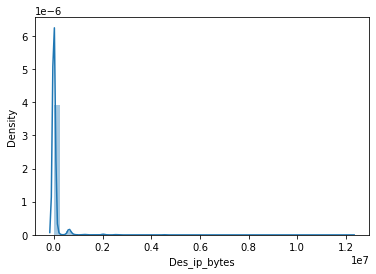

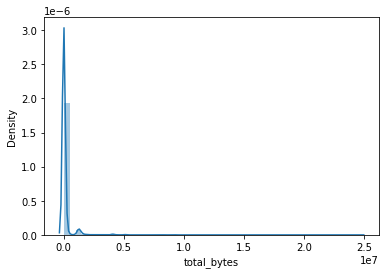

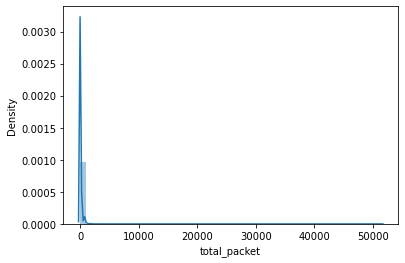

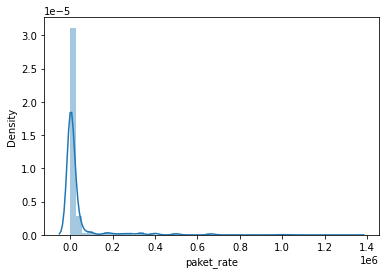

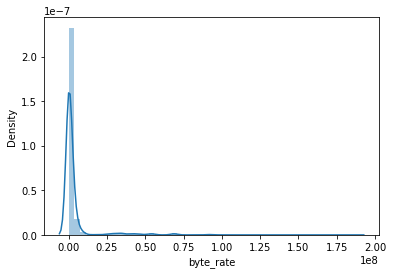

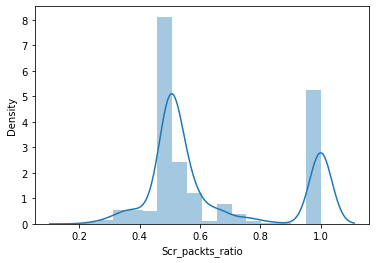

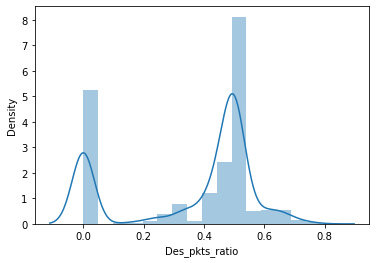

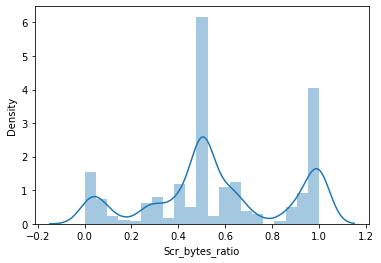

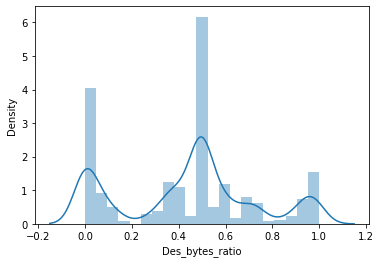

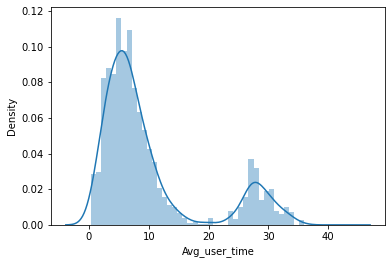

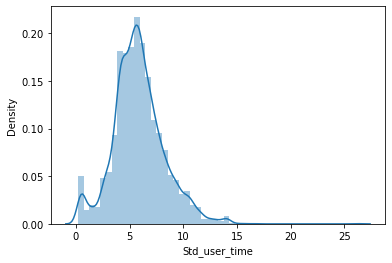

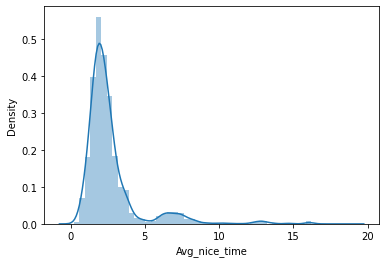

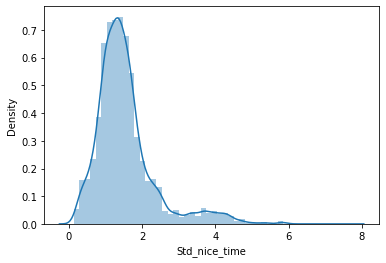

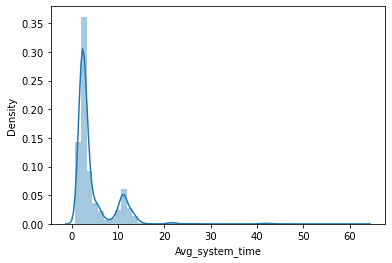

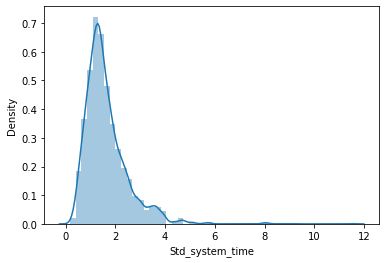

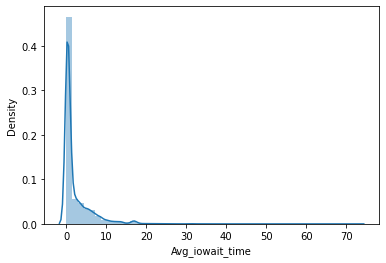

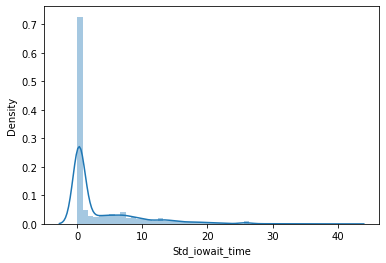

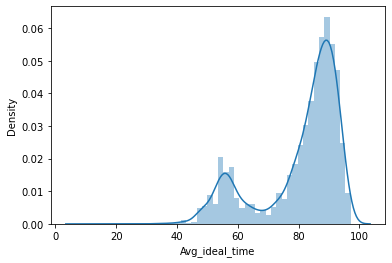

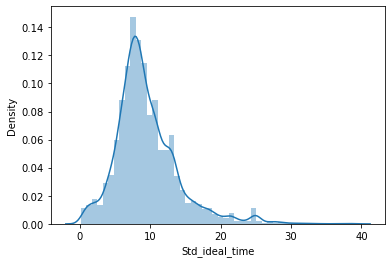

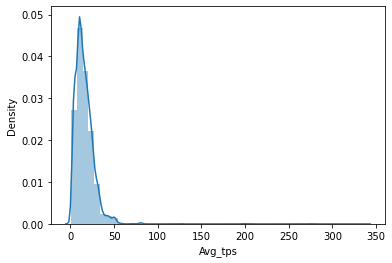

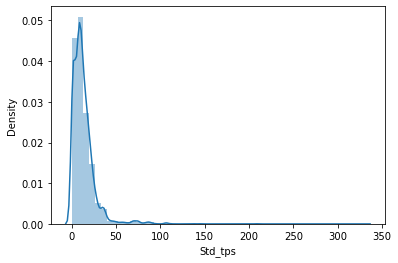

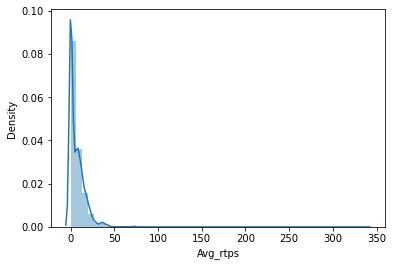

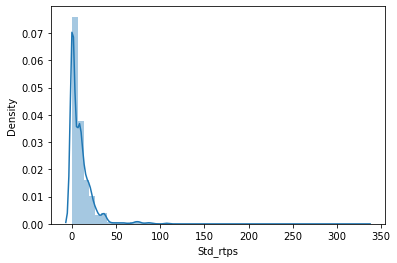

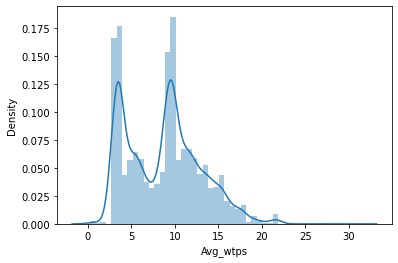

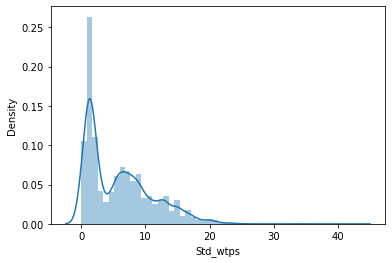

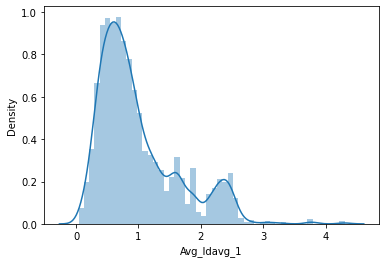

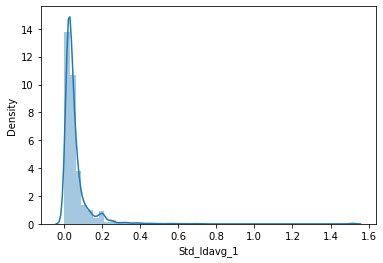

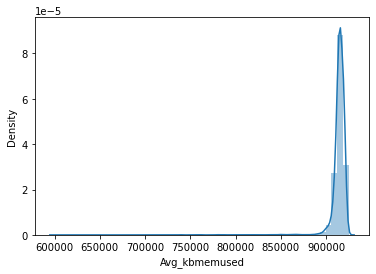

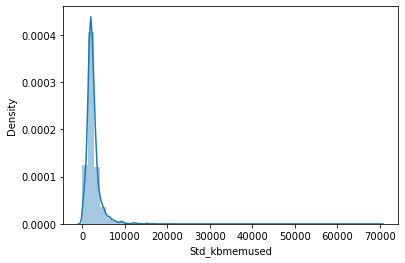

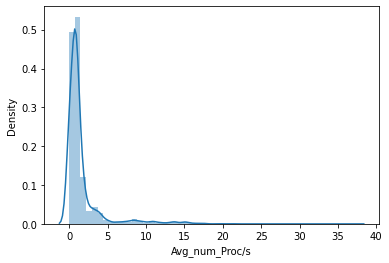

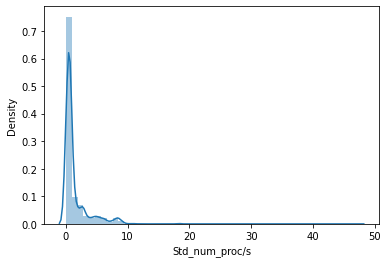

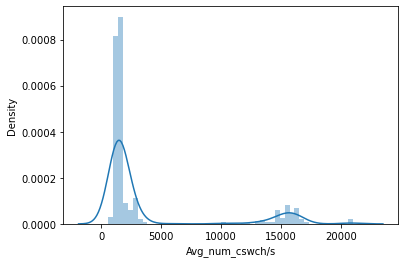

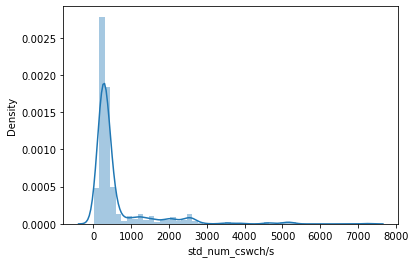

In [54]:
for col in dt_eda.select_dtypes(float):
    plt.figure()
    sns.distplot(dt_eda[col])

In [55]:
attack = dt_eda[dt_eda["class3"] == "Attack"]
normal = dt_eda[dt_eda["class3"] == "Normal"]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

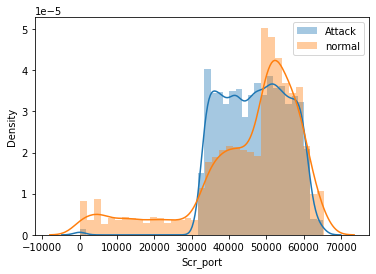

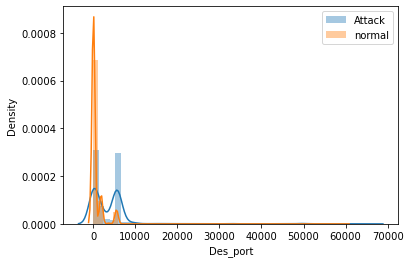

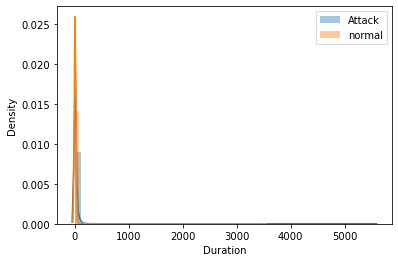

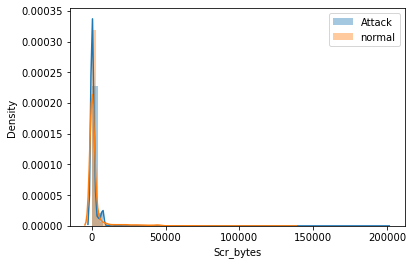

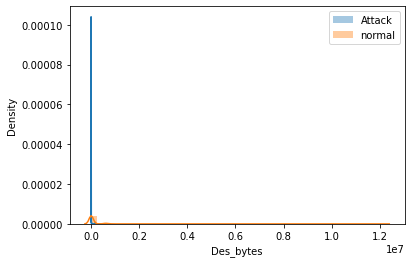

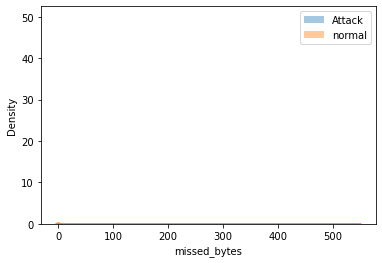

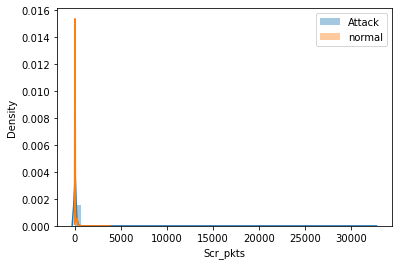

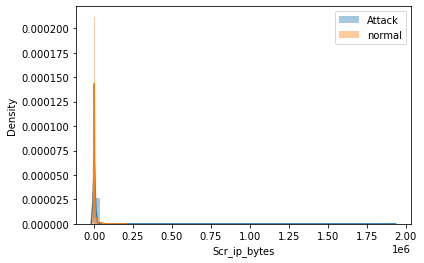

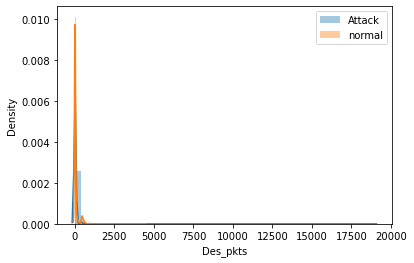

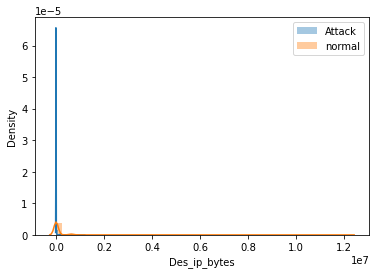

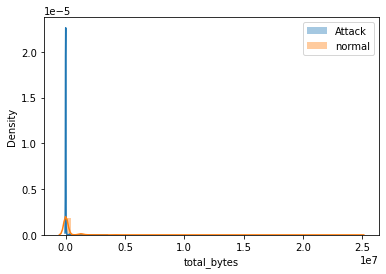

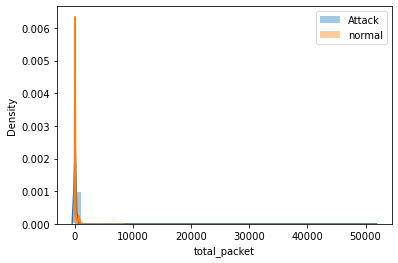

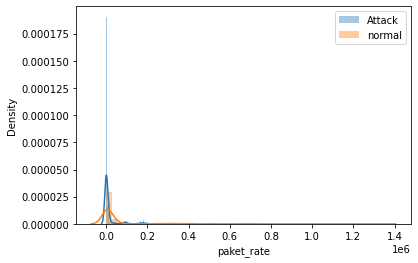

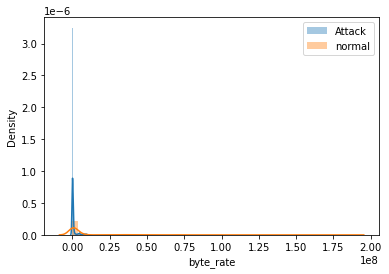

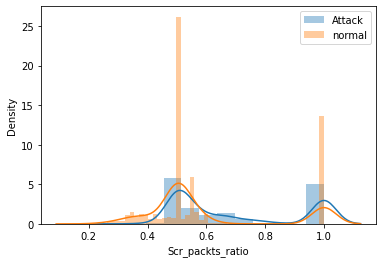

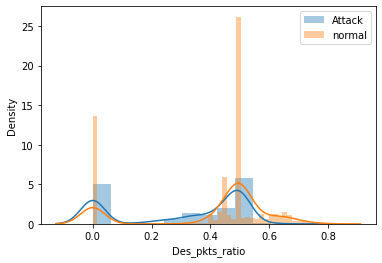

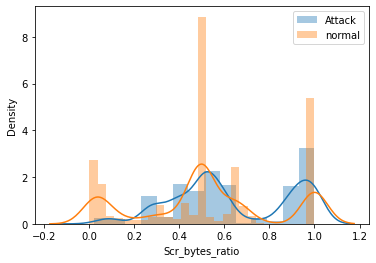

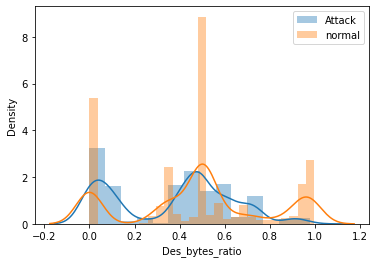

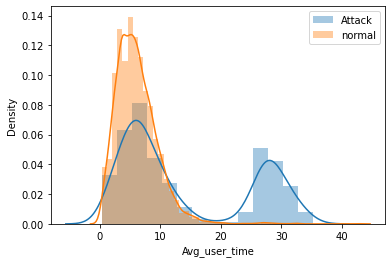

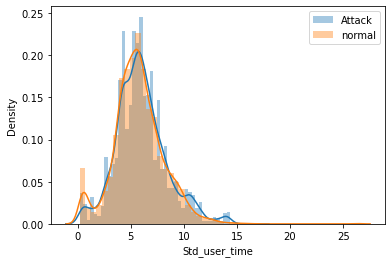

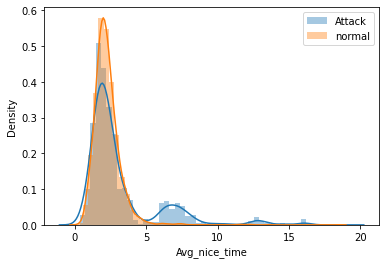

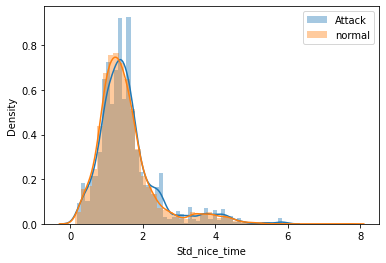

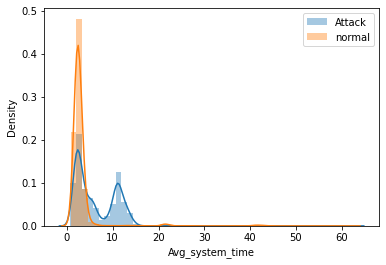

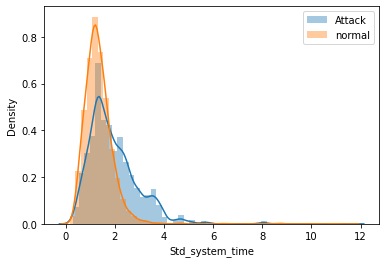

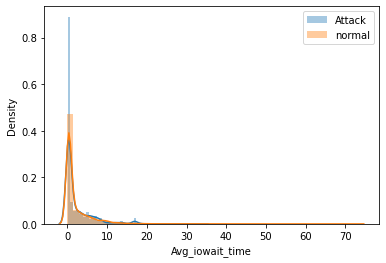

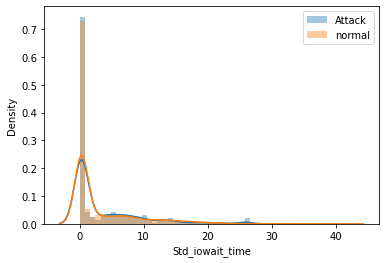

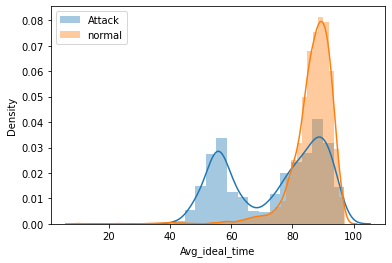

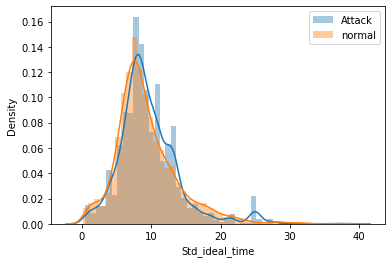

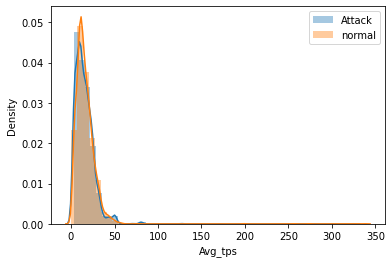

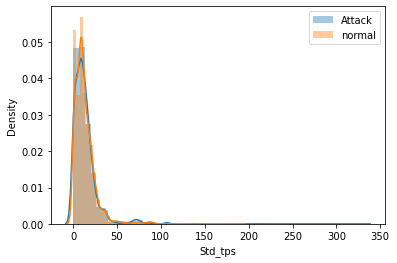

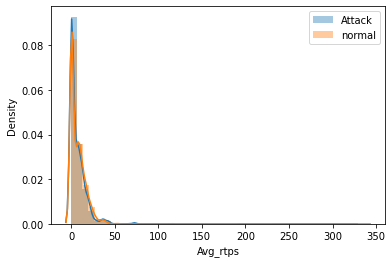

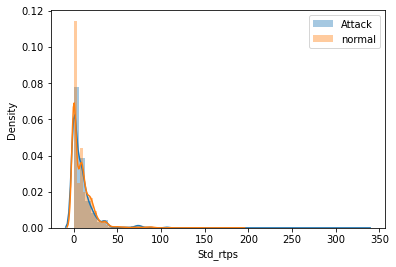

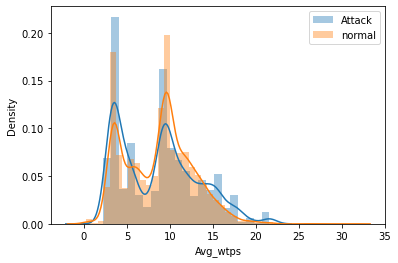

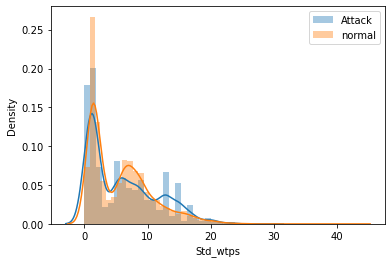

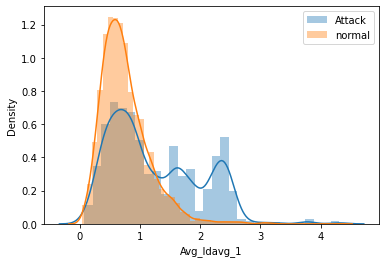

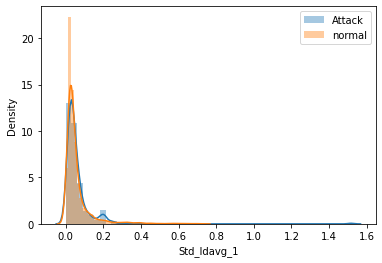

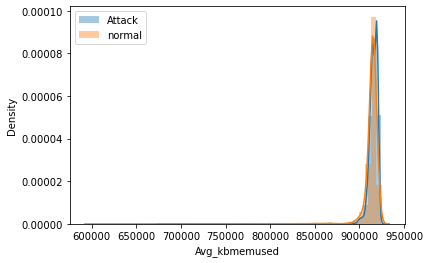

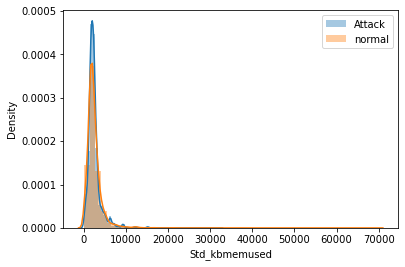

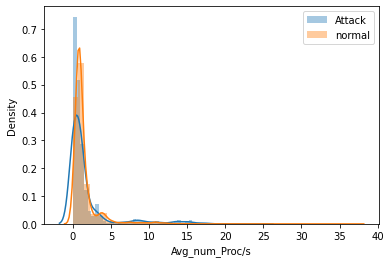

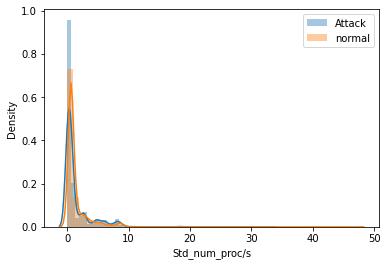

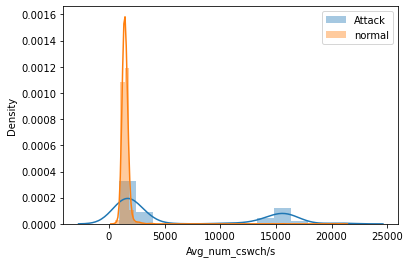

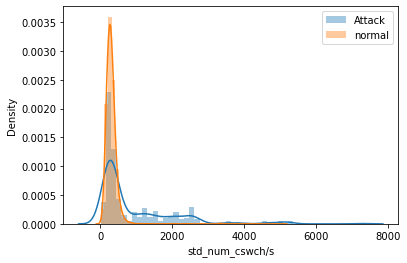

In [56]:
for col in dt_eda.select_dtypes(float):
    plt.figure()
    sns.distplot(attack[col], label='Attack')
    sns.distplot(normal[col], label='normal')
    plt.legend()

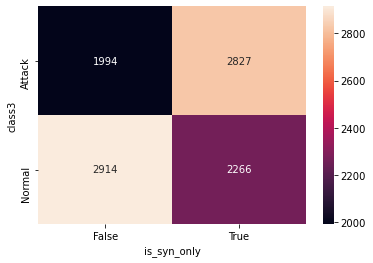

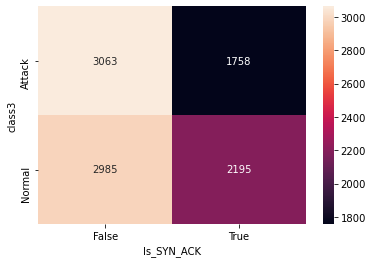

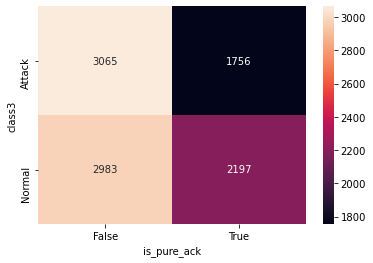

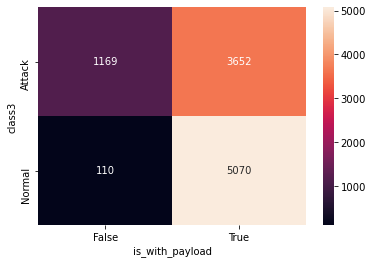

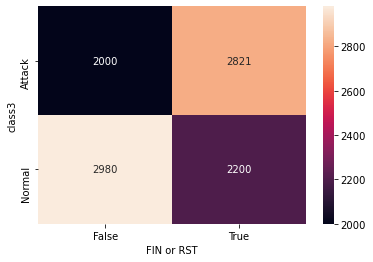

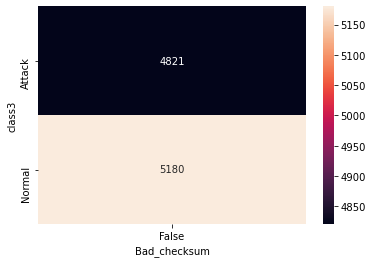

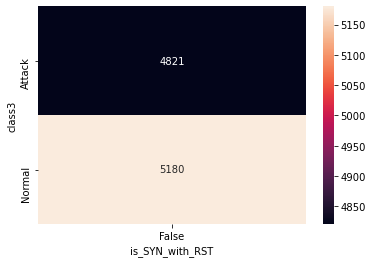

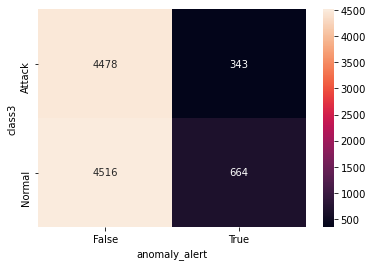

In [58]:
for col in dt_eda.select_dtypes(bool):
    plt.figure()
    sns.heatmap(pd.crosstab(dt_eda['class3'], dt_eda[col]), annot=True, fmt='d')

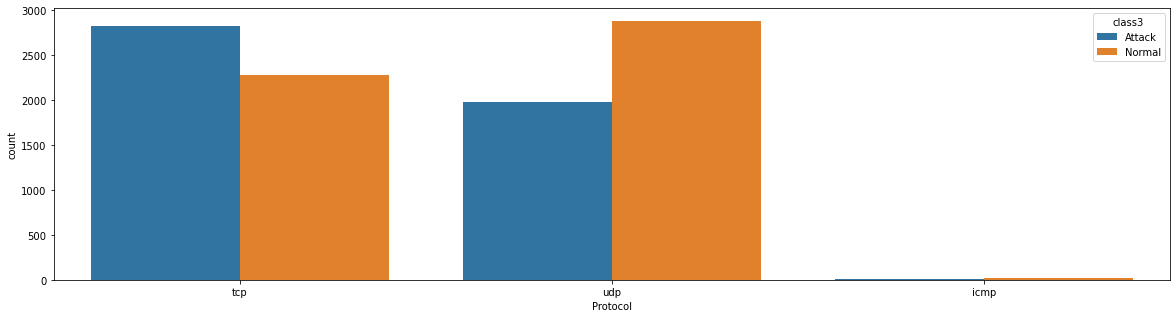

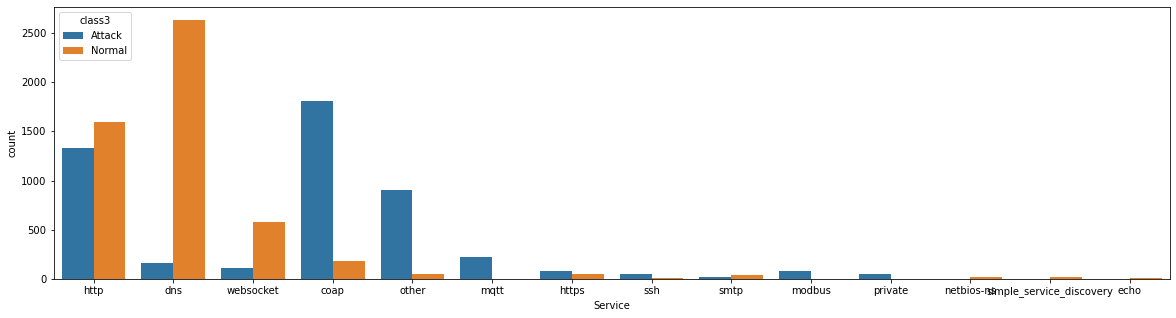

In [62]:
for col in ["Protocol","Service"]:
    plt.figure(figsize=(20,5))
    sns.countplot(x=col,hue='class3',data=dt_eda)

In [73]:
dt_eda["class3"] = dt_eda["class3"].replace({"Attack":1 ,"Normal" :0 })

In [76]:
dfcorr = dt_eda.corr()
dfcorr["class3"].sort_values()

Avg_ideal_time                -0.463141
is_with_payload               -0.331028
Conn_state                    -0.284054
Des_pkts_ratio                -0.220492
read_write_physical.process   -0.218596
byte_rate                     -0.197623
Des_bytes_ratio               -0.187393
paket_rate                    -0.163291
Des_ip_bytes                  -0.149687
total_bytes                   -0.140929
Des_bytes                     -0.139038
Scr_bytes                     -0.100032
anomaly_alert                 -0.094713
Des_pkts                      -0.075275
is_pure_ack                   -0.061211
Is_SYN_ACK                    -0.060392
Scr_ip_bytes                  -0.042852
total_packet                  -0.039974
Avg_rtps                      -0.022151
Avg_tps                       -0.021711
Scr_pkts                      -0.015294
missed_bytes                  -0.009646
Std_rtps                      -0.004568
Std_ldavg_1                   -0.003402
Avg_wtps                      -0.002887


In [77]:
dt_eda.head()

,Scr_port,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class3
0,49278.0,80.0,tcp,http,0.673690,13437.0,34924.0,1,0.0,True,True,True,True,True,False,False,105.0,18905.0,105.0,40392.0,True,107658.0,210.0,311.716071,1.598035e+05,0.500000,0.500000,0.300414,0.699586,9.207,5.555842,10.994,1.356305,4.864,1.873004,0.311,0.224653,74.624,8.245611,12.297,10.385850,8.0,10.507140,4.297,2.723579,2.146,0.102781,915852.8,2507.975630,5.1,3.238827,2806.2,158.749362,1,5,0,0,0,0,0,0,1
1,39769.0,53.0,udp,dns,0.000083,78.0,0.0,1,0.0,False,False,False,True,False,False,False,2.0,134.0,0.0,0.0,False,212.0,2.0,24096.385540,2.554217e+06,1.000000,0.000000,1.000000,0.000000,12.326,6.674248,2.895,1.604302,3.778,2.099742,2.741,5.327471,78.263,8.869399,6.600,5.713143,0.0,0.000000,6.600,5.713143,0.612,0.037630,910498.4,4044.112046,1.0,0.894427,1561.6,247.080230,0,0,0,0,0,0,0,0,0
2,59050.0,53.0,udp,dns,0.000132,38.0,38.0,1,0.0,False,False,False,True,False,False,False,1.0,66.0,1.0,66.0,False,208.0,2.0,15151.515150,1.575758e+06,0.500000,0.500000,0.500000,0.500000,6.931,6.416007,0.706,0.408906,1.693,0.771635,2.423,3.829810,88.245,7.112108,37.400,40.190049,30.1,39.798116,7.300,3.100000,0.550,0.020000,921020.4,2139.652645,1.0,0.000000,1603.3,294.139100,0,0,0,0,0,0,0,0,0
3,37966.0,1880.0,tcp,websocket,9.378481,1121.0,484.0,1,0.0,True,True,True,True,True,False,False,8.0,1545.0,6.0,804.0,False,3954.0,14.0,1.492779,4.216035e+02,0.571429,0.428571,0.674254,0.325746,10.244,7.932040,1.965,1.514168,3.941,1.709055,0.509,0.425522,83.339,10.206087,29.000,26.574424,23.3,26.126806,5.700,6.229767,0.708,0.026000,915874.8,977.885147,7.2,5.325411,1685.3,467.873712,0,0,1,1,1,1,1,1,0
4,38233.0,53.0,udp,dns,0.000074,NaN,NaN,1,0.0,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.181,5.980459,2.365,1.284463,2.415,1.401151,1.803,4.478256,88.239,8.090018,9.800,1.326650,0.1,0.300000,9.700,1.268858,0.536,0.030067,918213.2,2342.938360,0.6,0.489898,1456.5,346.884779,0,0,0,0,0,0,0,0,0


In [78]:
dt_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Scr_port                     9999 non-null   float64
 1   Des_port                     9999 non-null   float64
 2   Protocol                     9999 non-null   object 
 3   Service                      10001 non-null  object 
 4   Duration                     9065 non-null   float64
 5   Scr_bytes                    7251 non-null   float64
 6   Des_bytes                    7251 non-null   float64
 7   Conn_state                   10001 non-null  int64  
 8   missed_bytes                 9999 non-null   float64
 9   is_syn_only                  10001 non-null  bool   
 10  Is_SYN_ACK                   10001 non-null  bool   
 11  is_pure_ack                  10001 non-null  bool   
 12  is_with_payload              10001 non-null  bool   
 13  FIN or RST      

In [97]:
dt_ml = dt_eda.copy()

In [98]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [99]:
for col in dt_ml.select_dtypes(bool):
    dt_ml[col] = dt_ml[col].astype(int)

In [104]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [106]:
imputer = SimpleImputer(missing_values=np.nan,
             strategy='most_frequent')

categorical_pipeline = make_pipeline(imputer,OrdinalEncoder()) 
preprocessor = make_column_transformer((categorical_pipeline,["Protocol","Service"]))
dt_ml[["Protocol","Service"]] = preprocessor.fit_transform(dt_ml)

In [112]:
column = list(dt_ml.drop(columns=["Protocol","Service","class3"]))

In [113]:
imputer = SimpleImputer(missing_values=np.nan,
             strategy='mean')

num_pipeline = make_pipeline(imputer,StandardScaler()) 
preprocessor = make_column_transformer((num_pipeline,column))
dt_ml[column] = preprocessor.fit_transform(dt_ml)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test = train_test_split(dt_ml.drop(columns=["class3"]),dt_ml["class3"],test_size=0.2)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [126]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_classif

In [138]:
RandomForest = make_pipeline(SelectKBest(f_classif, k=20), RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(SelectKBest(f_classif, k=20), AdaBoostClassifier(random_state=0))
SVM = make_pipeline(SelectKBest(f_classif, k=20),  SVC(random_state=0))
KNN = make_pipeline(SelectKBest(f_classif, k=20),  KNeighborsClassifier())
LG = make_pipeline(SelectKBest(f_classif, k=20),  LogisticRegression())

In [139]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  'logisticregression' : LG
                 }

In [140]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

RandomForest


C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[1041    8]
 [  36  916]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1049
           1       0.99      0.96      0.98       952

    accuracy                           0.98      2001
   macro avg       0.98      0.98      0.98      2001
weighted avg       0.98      0.98      0.98      2001



C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

AdaBoost


C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[1036   13]
 [  54  898]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1049
           1       0.99      0.94      0.96       952

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

SVM


C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[1041    8]
 [  82  870]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1049
           1       0.99      0.91      0.95       952

    accuracy                           0.96      2001
   macro avg       0.96      0.95      0.95      2001
weighted avg       0.96      0.96      0.95      2001



C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

KNN


C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[1035   14]
 [  61  891]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1049
           1       0.98      0.94      0.96       952

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

logisticregression
[[1036   13]
 [  86  866]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1049
           1       0.99      0.91      0.95       952

    accuracy                           0.95      2001
   macro avg       0.95      0.95      0.95      2001
weighted avg       0.95      0.95      0.95      2001



C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\hp\anaconda3\lib\site-pack

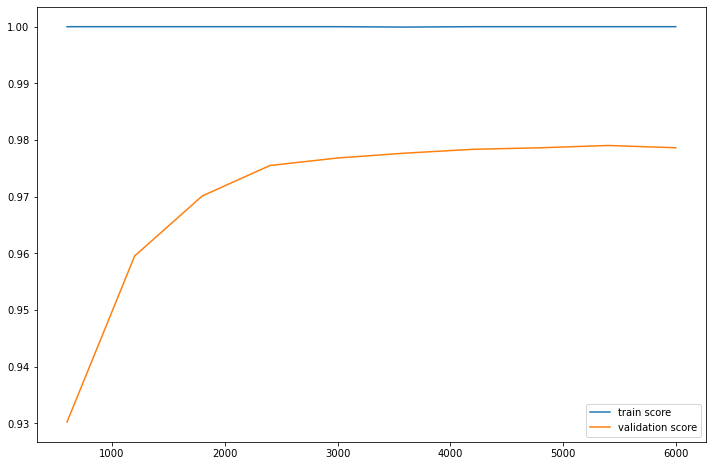

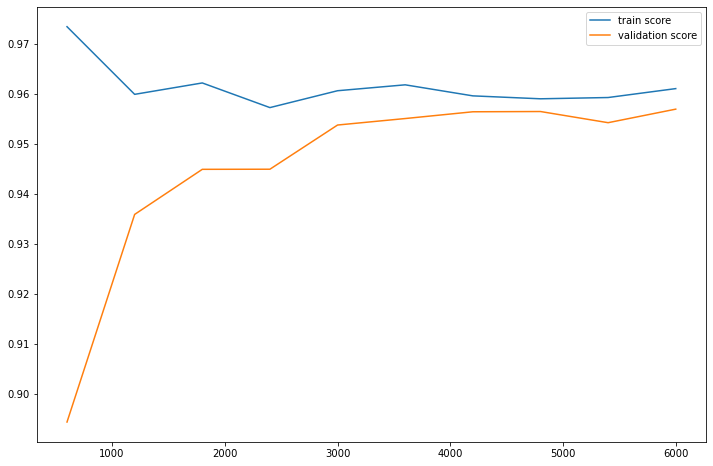

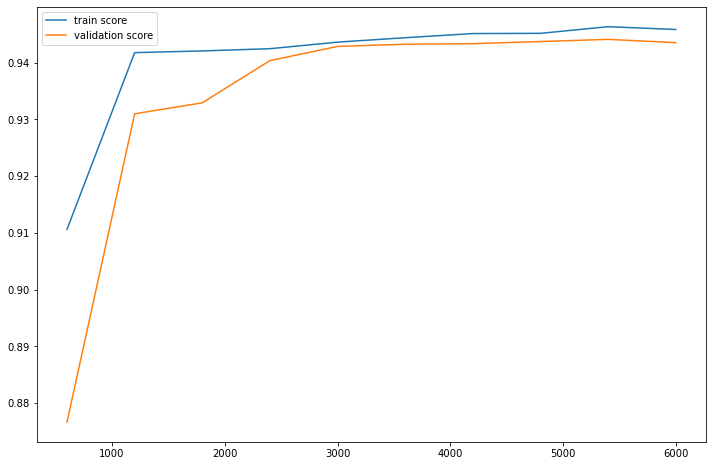

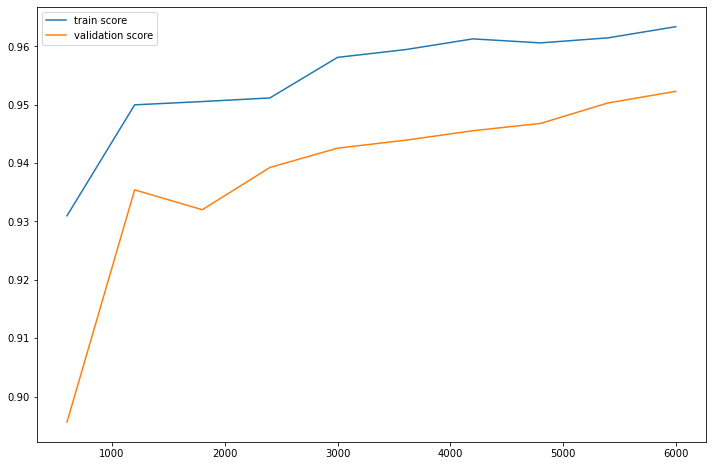

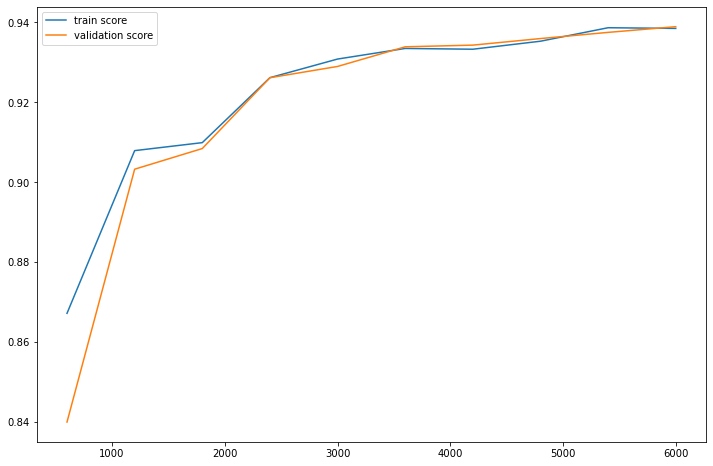

In [141]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [145]:
LG.score(x_test,y_test)

0.9505247376311844

<AxesSubplot:>

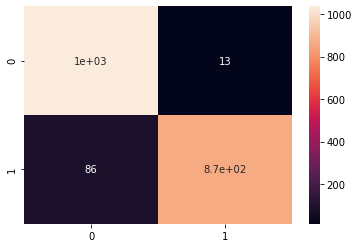

In [151]:
cm = confusion_matrix(y_test, LG.predict(x_test))
sns.heatmap(cm, annot=True)

### note : 0 ==> normal , 1===> attack